## Khabri - EDA_Assessment


#### Submitted By - Anshul Gupta

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Avoid warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read Dataset

data = pd.read_csv("Churn_prediction.csv")

In [3]:
# Head of Dataset

data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Shape of Dataset

print("Shape of Dataset: {}".format(data.shape))
print("Number of rows: {}".format(data.shape[0]))
print("Number of columns: {}".format(data.shape[1]))

Shape of Dataset: (3333, 21)
Number of rows: 3333
Number of columns: 21


In [5]:
# Identifying Numerical columns

numericals_cols = data.select_dtypes(['int64','float64'])

numericals_columns = list(numericals_cols.columns)

numericals_cols

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [6]:
# List of numerical columns

numericals_columns

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [7]:
# Identifying Categorical columns

categorical_cols = data.select_dtypes(['object'])

categorical_columns = list(categorical_cols.columns)

categorical_cols

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


In [8]:
# List of categorical columns

categorical_columns

['state', 'phone number', 'international plan', 'voice mail plan']

In [17]:
# General Info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [18]:
# Descriptive Statistics about data (Numerical columns)

data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Descriptive Statistics about data (Categorical columns)

data.describe(include=['object'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,371-7917,no,no
freq,106,1,3010,2411


### Null Value Analysis

In [19]:
# Checking for null values

data.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

### Outliers Analysis

In [22]:
# Checking for outliers in continous columns
# Outlier is a value that lies outside of range [Q1-1.5*IQR,Q3+1.5*IQR]

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage'])

for col in numericals_columns:
    
    #First quantile(q1)
    q1 = data[col].quantile(0.25)
    
    #Third quantile(q3)
    q3 = data[col].quantile(0.75)
    
    #IQR
    iqr = q3 - q1
    
    #lower_fence
    fence_low = q1 - 1.5*iqr
    
    #higher_fence
    fence_high = q3 + 1.5*iqr
    
    total_outlier = data[(data[col] < fence_low) | (data[col] > fence_high)].shape[0]
    
    percent = (total_outlier / len(data[col])) * 100
    
    outliers = outliers.append({"Feature":col, "Number of Outliers": total_outlier, "Percentage" : percent},ignore_index=True)
    
outliers

,Feature,Number of Outliers,Percentage
0,account length,18,0.540054
1,area code,0,0.000000
2,number vmail messages,1,0.030003
3,total day minutes,25,0.750075
4,total day calls,23,0.690069
5,total day charge,25,0.750075
6,total eve minutes,24,0.720072
7,total eve calls,20,0.600060
8,total eve charge,24,0.720072
9,total night minutes,30,0.900090


#### Observations

- Customer service calls attribute contains a signifant high percentage of outliers.

- Rest all of the attribute have either low or neglible percent of outliers

# Exploratory Data Analysis

#### Univariate Analysis

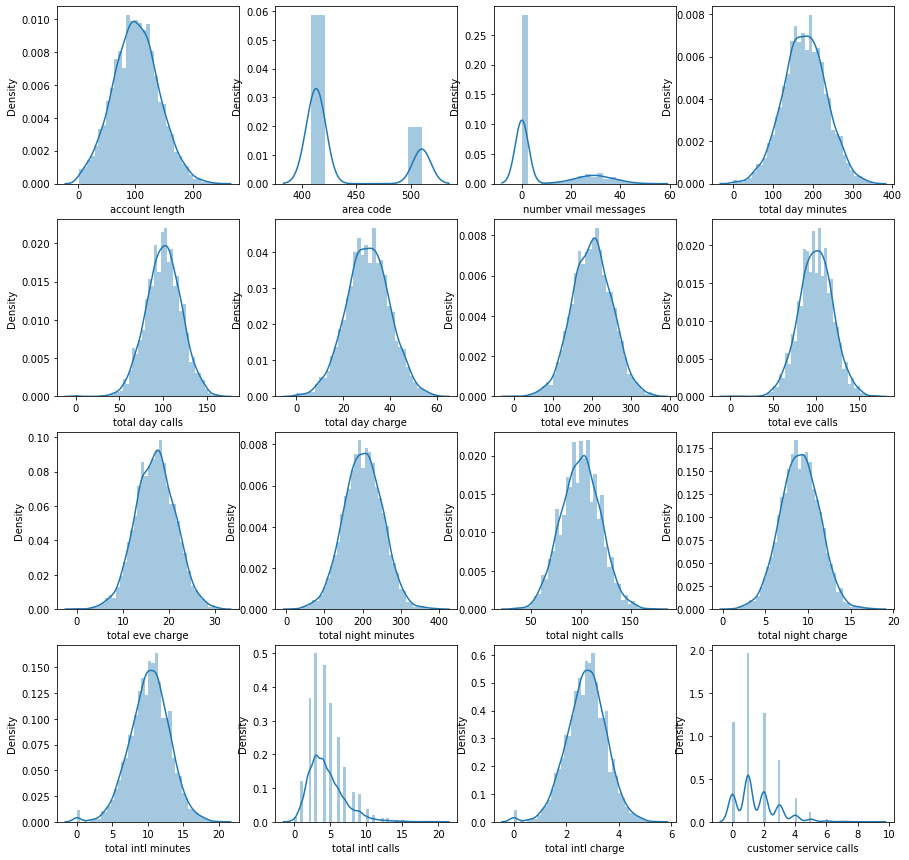

In [12]:
# Plotting distribution of continous columns

plt.figure(figsize = (15,15))

i = 1

for col in numericals_columns:
    
    plt.subplot(4,4,i)
    
    sns.distplot(data[col])
    
    i = i + 1

### Observations

- Most of the features are normally distributed (centered around their mean)

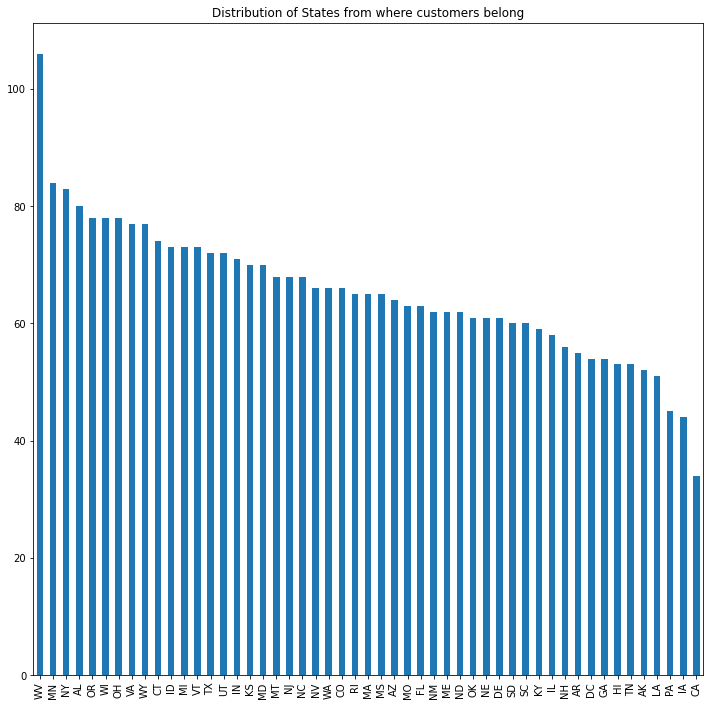

In [14]:
# Distribution of states from where customers belong

plt.figure(figsize=(12,12))

data['state'].value_counts().plot(kind='bar')

plt.title('Distribution of States from where customers belong')

plt.xticks(rotation = 90)

plt.show()

#### Observations

- Most of the customers belong to West Virginia (WV) state

- California is the state having least number of customers

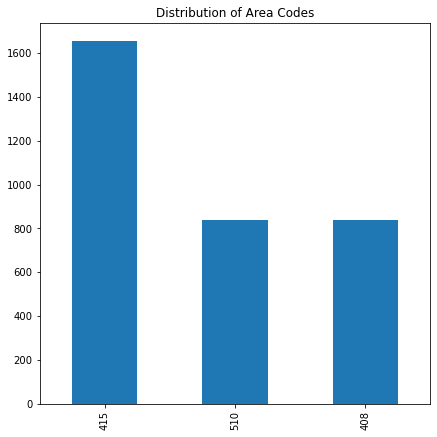

In [16]:
# Distribution of Area codes

plt.figure(figsize=(7,7))

data['area code'].value_counts().plot(kind='bar')

plt.title('Distribution of Area Codes')

plt.show()

#### Observations

- 415 Area code is the one having maximum number of customers

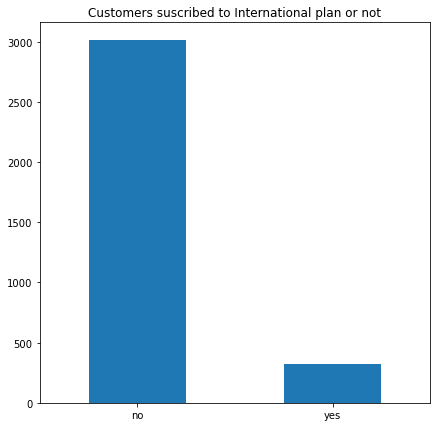

In [19]:
# Distribution of Customers suscribed to international plan or not

plt.figure(figsize=(7,7))

data['international plan'].value_counts().plot(kind='bar')

plt.title('Customers suscribed to International plan or not')

plt.xticks(rotation =0)

plt.show()

### Observations

- Most of the customers aren't suscribed to the international plan

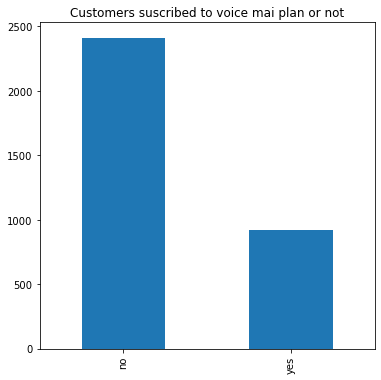

In [44]:
# Distribution of Customers suscribed to voice mail plan or not

plt.figure(figsize=(6,6))

data['voice mail plan'].value_counts().plot(kind='bar')

plt.title('Customers suscribed to voice mail plan or not')

plt.show()

### Observations

- Most of the customers aren't suscribed to the voice mail plan

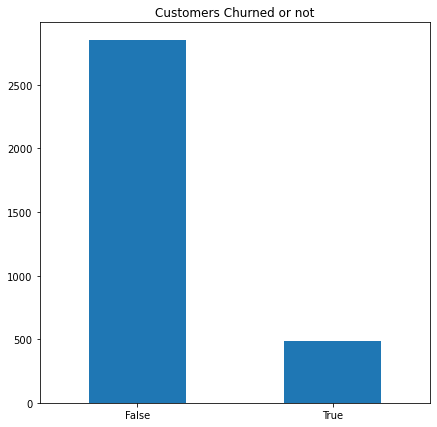

In [21]:
# Distribution of Customers Churned

plt.figure(figsize=(7,7))

data['churn'].value_counts().plot(kind='bar')

plt.title('Customers Churned or not')

plt.xticks(rotation=0)

plt.show()

In [45]:
data['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

#### Bivariate Analysis

In [46]:
# Correlation among features of dataframe

data.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


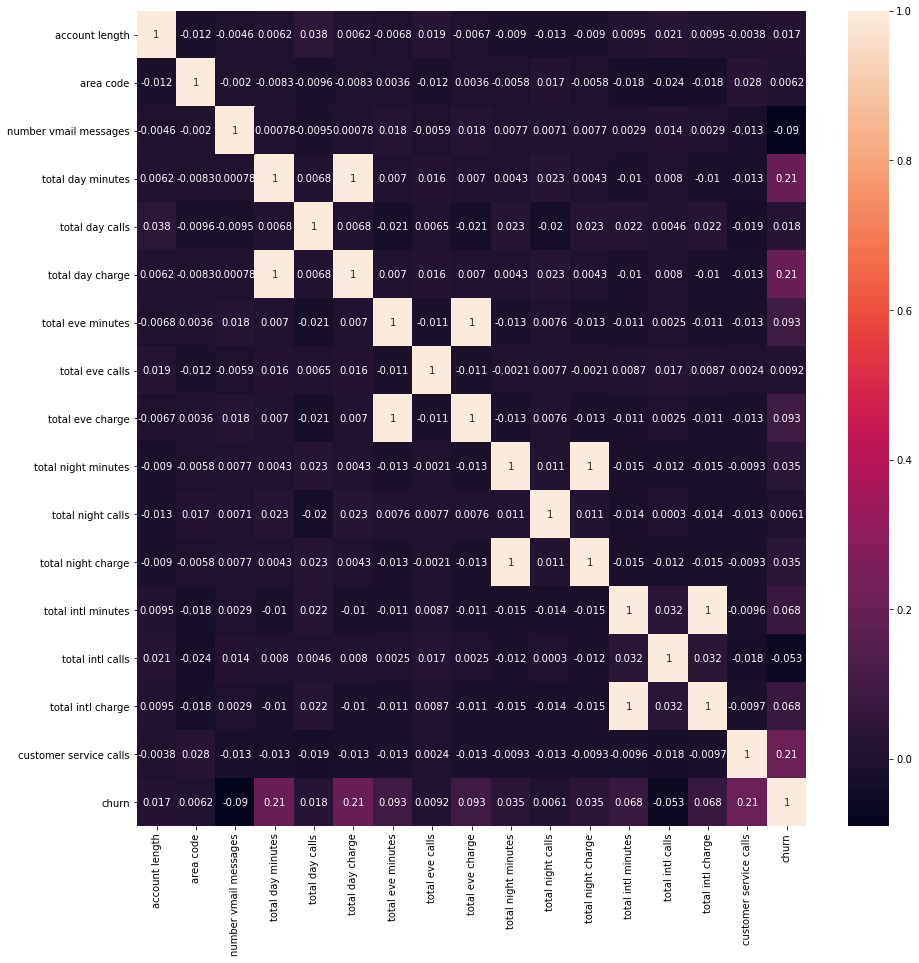

In [49]:
# Plotting a heatmap to display correlation

plt.figure(figsize=(15,15))

sns.heatmap(data.corr(),annot=True)

plt.show()

#### Observations

- More the numbers of minutes spent on the call, more is the charge corresponding to it. Columns like total day/evening/night/international charges,etc are perfectly correlated with their associated minutes spent.

- Customers service calls, total day minutes, total day charge are slightly correlated to whether customer would churn or not.

- Rest all of the features are negatively correlated to each other

In [58]:
# Finding out Statistics with respect to each states

churned_states = data.groupby(by='state').agg('count')

churned_states

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AK,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
AL,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
AR,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
AZ,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
CA,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
CO,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
CT,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
DC,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
DE,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


In [61]:
# Finding out state with highest churned customers

churned_states.sort_values(by='churn',ascending=False)['churn']

state
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: churn, dtype: int64

### Observations

- Customers belong to state West Virginia has highest churned percentage

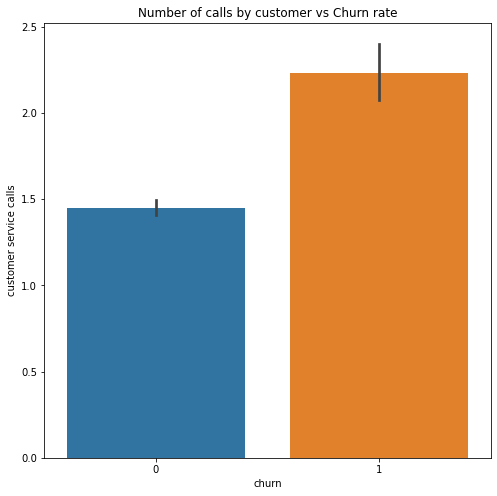

In [92]:
# Finding churn rate with respect to the number of times the customers called the service

plt.figure(figsize=(8,8))

sns.barplot(x=data['churn'],y=data['customer service calls'])

plt.title('Number of calls by customer vs Churn rate')

plt.show()

#### Observations

- More the number of times the customers called the customer service, higher is the churn rate

### Data Preprocessing

In [72]:
# Label Encoding the categorical features

from sklearn.preprocessing import LabelEncoder

# Encoder object
encoder = LabelEncoder()

categorical = list(data.select_dtypes('object').columns)

# Fitting encoder in categorical objects
for col in categorical:
    data[col]= encoder.fit_transform(data[col]) 

In [73]:
# Encoded data --> Data is ready to be trained

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
# Splitting Data

# Features
X = data.iloc[:,:-1]

# Target column
y = data.iloc[:,-1]

In [75]:
# Splitting features and target variable into training and testing data

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42)

### Vanilla Algorithms Modelling

In [76]:
# Simple Logistic Regression Model

from sklearn.linear_model import LogisticRegression

clf_1 = LogisticRegression()

clf_1.fit(X_train, y_train)

# Accuracy Score on Test Data
clf_1_score = clf_1.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_1.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.85


C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier object
clf_3 = DecisionTreeClassifier()

# Fitting Training data
clf_3.fit(X_train, y_train)

# Accuracy Score on Test Data
clf_3_score = clf_3.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_3.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.92


In [80]:
# Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier object
clf_4 = RandomForestClassifier()

# Fitting training data in Rf object
clf_4.fit(X_train, y_train)

# Accuracy Score on Test Data
clf_4_score = clf_4.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(clf_4.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(clf_4.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.94


### Conclusions

- Logisitic Regression is giving approximately same results on both the training and test data
<br>
- Decision Tree and Random Forest both are likely overfitting the training data and although the peformance on test set is still pretty good

In [ ]:
### End of assessment